In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.ConvNet=nn.Sequential(
            nn.Conv2d(1,6,5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        )
        self.Fc=nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
    def forward(self,x):
        x=self.ConvNet(x)
        x=x.view(-1,16*5*5)
        x=self.Fc(x)
        
        return x


In [8]:
BATCH_SIZE=64
LR=0.001
EPOCHS=50

In [11]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainSet = datasets.MNIST(root='MNIST', download=True, train=True, transform=transform)
testSet = datasets.MNIST(root='MNIST', download=True, train=False, transform=transform)

In [12]:
train_loader=DataLoader(trainSet,batch_size=BATCH_SIZE,shuffle=True,num_workers=10)
test_loader =DataLoader(testSet, batch_size=BATCH_SIZE, shuffle=False, num_workers=10)

In [15]:
model=LeNet().cuda()

optimizer=optim.SGD(model.parameters(), lr=LR,momentum=0.9)
loss_func=nn.CrossEntropyLoss()


loss_value=[]
loss_in_firstEpoch=[]
acc_train=[]
acc_test=[]

for epoch in range(EPOCHS):
    
    model.train()
    correct_train=0
    l=0
    for index,(x,y) in enumerate(train_loader):
        x,y=x.cuda(),y.cuda()
        x,y=Variable(x),Variable(y)
        output=model(x)
        loss=loss_func(output,y)
        l+=loss.data
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch == 0:
            loss_in_firstEpoch.append(loss.data)
        
        pred = output.argmax(dim=1, keepdim=True) 
        correct_train += pred.eq(y.view_as(pred)).sum().item()
    
    
    l/=len(train_loader.dataset)
    correct_train=100. * (correct_train / len(train_loader.dataset))
    print(correct_train)
    acc_train.append(correct_train)
    
    print("Epoch: [%3d], Loss: %.5f" %(epoch + 1,l ))
    loss_value.append(l)
    
    model.eval()
    correct_test=0
    with torch.no_grad():
        for index,(x,y) in enumerate(test_loader):
            x,y=x.cuda(),y.cuda()
            x,y=Variable(x),Variable(y)
            output=model(x)
            pred = output.argmax(dim=1, keepdim=True) 
            correct_test += pred.eq(y.view_as(pred)).sum().item()
    correct_test=100. * (correct_test / len(test_loader.dataset))
    print(correct_test)
    acc_test.append(correct_test)

43.355
Epoch: [  1], Loss: 0.02846
84.52
88.49833333333333
Epoch: [  2], Loss: 0.00585
92.25
93.05333333333333
Epoch: [  3], Loss: 0.00357
95.08
94.98
Epoch: [  4], Loss: 0.00256
95.73
95.97166666666666
Epoch: [  5], Loss: 0.00204
96.72
96.61
Epoch: [  6], Loss: 0.00170
96.91
97.08166666666666
Epoch: [  7], Loss: 0.00148
97.53
97.34666666666666
Epoch: [  8], Loss: 0.00133
97.38
97.64833333333334
Epoch: [  9], Loss: 0.00121
97.82
97.81333333333333
Epoch: [ 10], Loss: 0.00110
97.82
97.97833333333334
Epoch: [ 11], Loss: 0.00104
97.86
98.10333333333332
Epoch: [ 12], Loss: 0.00095
98.17
98.23166666666665
Epoch: [ 13], Loss: 0.00089
98.27
98.31
Epoch: [ 14], Loss: 0.00085
98.50999999999999
98.4
Epoch: [ 15], Loss: 0.00080
98.24000000000001
98.51166666666667
Epoch: [ 16], Loss: 0.00074
98.4
98.57333333333334
Epoch: [ 17], Loss: 0.00071
98.64
98.655
Epoch: [ 18], Loss: 0.00067
98.22
98.715
Epoch: [ 19], Loss: 0.00065
98.18
98.81166666666667
Epoch: [ 20], Loss: 0.00060
98.64
98.80666666666667
E

In [17]:
folder='./LeNet/'

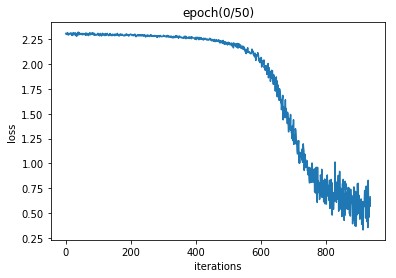

In [21]:
plt.plot(np.arange(len(loss_in_firstEpoch)),loss_in_firstEpoch)
plt.title('epoch(0/50)')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.savefig(folder+'5_3.png')
plt.show()

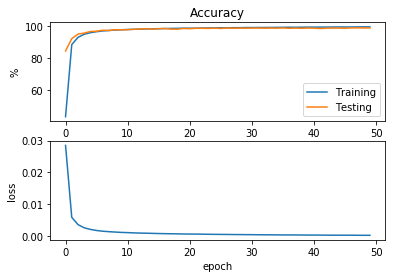

In [26]:
plt.subplot(2,1,1)
plt.plot(np.arange(len(acc_train)),acc_train,label='Training')
plt.plot(np.arange(len(acc_test)),acc_test,label='Testing')
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.ylabel('%')
plt.subplot(2,1,2)
plt.plot(np.arange(len(loss_value)),loss_value)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig(folder+'5_4.png')
plt.show()

In [28]:
torch.save(model,folder+'LeNet.pkl')

C:\Users\ec131b\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LeNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [30]:
model=torch.load(folder+'LeNet.pkl')
print(model)

LeNet(
  (ConvNet): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Fc): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [36]:
print(type(trainSet[0][0]))

<class 'torch.Tensor'>


In [39]:
len(testSet[0])

2